### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('files/The E-commerce Dataset.csv')
df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [24]:
null_counts = df.isnull().sum()
null_counts

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [34]:
none_counts = df[df['review'] == 'none']
print( 'Number of none reviews: ', none_counts.shape[0])

Number of none reviews:  18


In [5]:
print(df.shape)

(20000, 11)


In [6]:
# Removing the rows that contain null data

df_filtered = df[(~df['rating'].isnull()) & (~df['helpfulness'].isnull()) & (~df['gender'].isnull()) & (df['review'] != 'none')]
df_filtered

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [7]:
df_filtered.shape

(19916, 11)

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [35]:
# total number of unique users, unique reviews, unique items, and unique categories

print("Total Number of Unique Users : ", df_filtered['userId'].nunique())
print("Total Number of Unique Reviews : ", df_filtered['review'].nunique()) 
print("Total Number of Unique Items : ", df_filtered['item'].nunique())
print("Total Number of Unique Categories : ", df_filtered['category'].nunique())

Total Number of Unique Users :  8562
Total Number of Unique Reviews :  19459
Total Number of Unique Items :  89
Total Number of Unique Categories :  9


In [9]:
# the total number, mean, std, min and max regarding all rating records

rates_stats = df_filtered['rating'].agg(['count','mean','std','max','min'])
print(rates_stats)

count    19916.000000
mean         3.701798
std          1.404451
max          5.000000
min          1.000000
Name: rating, dtype: float64


In [36]:
# mean, std, max, and min of the number of items rated by different genders

gender_stats = df_filtered.groupby('gender')['rating'].agg(['mean','std','max','min'])
print(gender_stats)

            mean       std  max  min
gender                              
F       3.717451  1.395355  5.0  1.0
M       3.686654  1.413098  5.0  1.0


In [37]:
# mean, std, max, min of the number of ratings that received by each items

items_stats = df_filtered.groupby('item')['rating'].agg(['mean','std','max','min'])
print(items_stats)

                           mean       std  max  min
item                                               
AOL (America Online)   2.500532  1.368528  5.0  1.0
All Advantage          3.412481  1.541706  5.0  1.0
Alta Vista (by 1stUp)  3.541401  1.263341  5.0  1.0
Amazon.com             3.683333  1.571095  5.0  1.0
American Airlines      3.054054  1.417015  5.0  1.0
...                         ...       ...  ...  ...
Wendy's                3.971429  1.093322  5.0  1.0
What Lies Beneath      3.450000  1.201676  5.0  1.0
X-Men                  4.118367  0.853074  5.0  1.0
X.com                  4.023121  1.474409  5.0  1.0
eBay                   4.333893  0.949618  5.0  1.0

[89 rows x 4 columns]


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

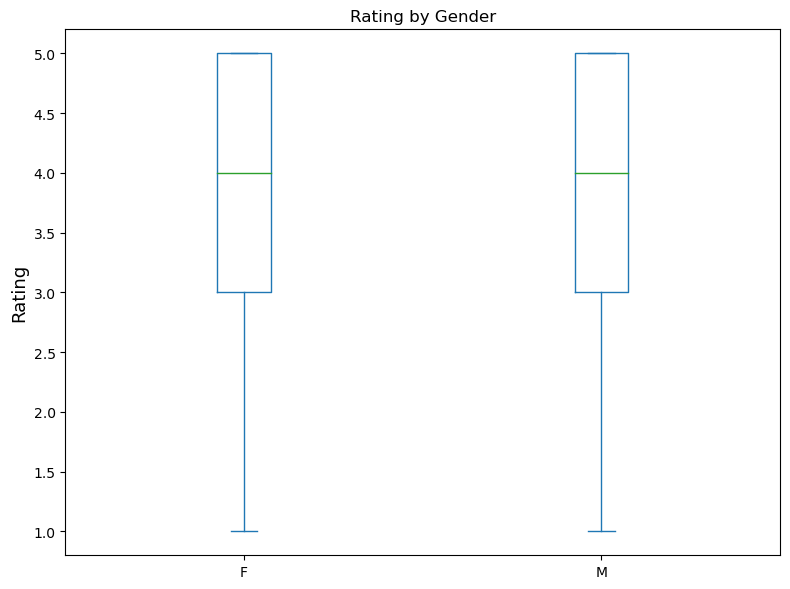

In [14]:
df_filtered.plot.box(column="rating", by="gender", figsize=(8,6))
plt.ylabel('Rating', fontsize = 13)
plt.title('Rating by Gender')

plt.tight_layout()

*Based on the graph, it appears that both male and female users give similar ratings. For further evaluation, in the next graph, we are going to look do male/female users tend to provide higher ratings on some specific categories than male/female users.*

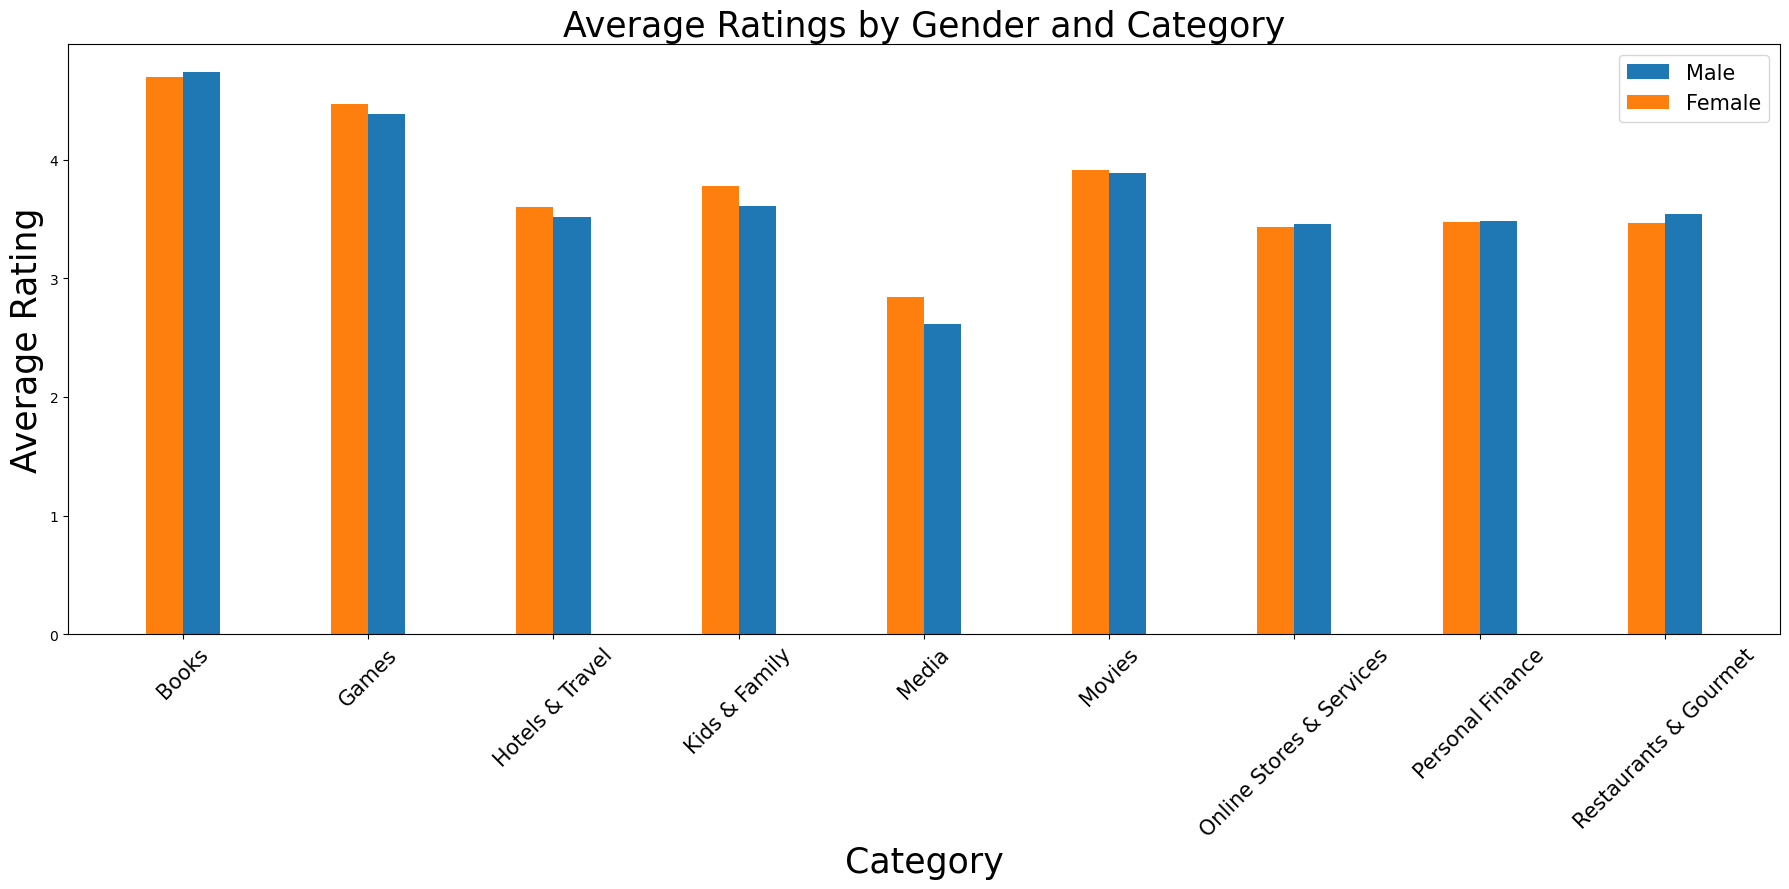

In [40]:
category_avg_ratings = df.groupby(['category', 'gender'])['rating'].mean().reset_index()
males = category_avg_ratings[category_avg_ratings['gender'] == 'M']
females = category_avg_ratings[category_avg_ratings['gender'] == 'F']

plt.figure(figsize = (18,9))

plt.bar(males['category'], males['rating'], width=0.2, label='Male', align='edge')
plt.bar(females['category'], females['rating'], width=-0.2, label='Female', align='edge')

plt.xlabel('Category', fontsize = 25)
plt.ylabel('Average Rating', fontsize = 25)
plt.title('Average Ratings by Gender and Category', fontsize = 25)
plt.legend(fontsize = 15)
plt.xticks(rotation=45, fontsize = 15)

plt.tight_layout()

*After analyzing the graph, it is evident that female users rated higher in 5 categories while male users rated higher in 4 categories. Overall, it can be concluded that both male and female users provided nearly identical ratings.*

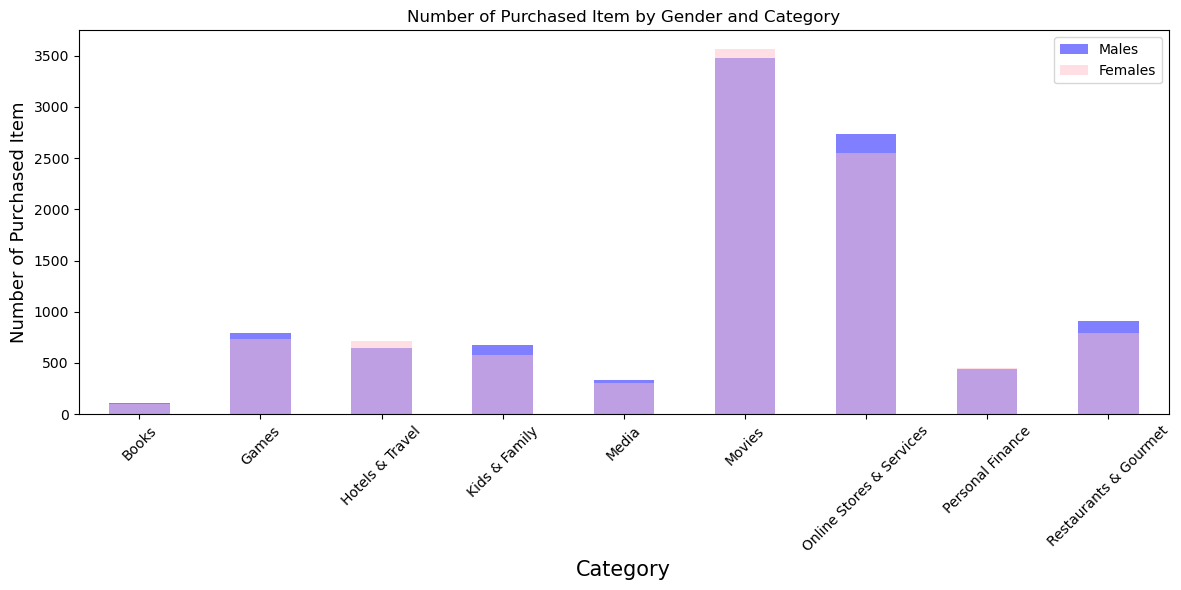

In [16]:
category_gender = df_filtered.groupby(['category','gender']).size().unstack()
males = category_gender['M']
females = category_gender['F']

plt.figure(figsize=(12,6))

males.plot.bar(alpha = 0.5, color= "blue")
females.plot.bar(alpha = 0.5, color = "pink")

plt.xticks(rotation= 45)
plt.legend(["Males", "Females"])
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Number of Purchased Item', fontsize = 13)
plt.title('Number of Purchased Item by Gender and Category')

plt.tight_layout()

*The graph displays that, with the exception of Hotel & Travel, Movies, and Personal Finance, male users purchase more products across most categories than female users.*

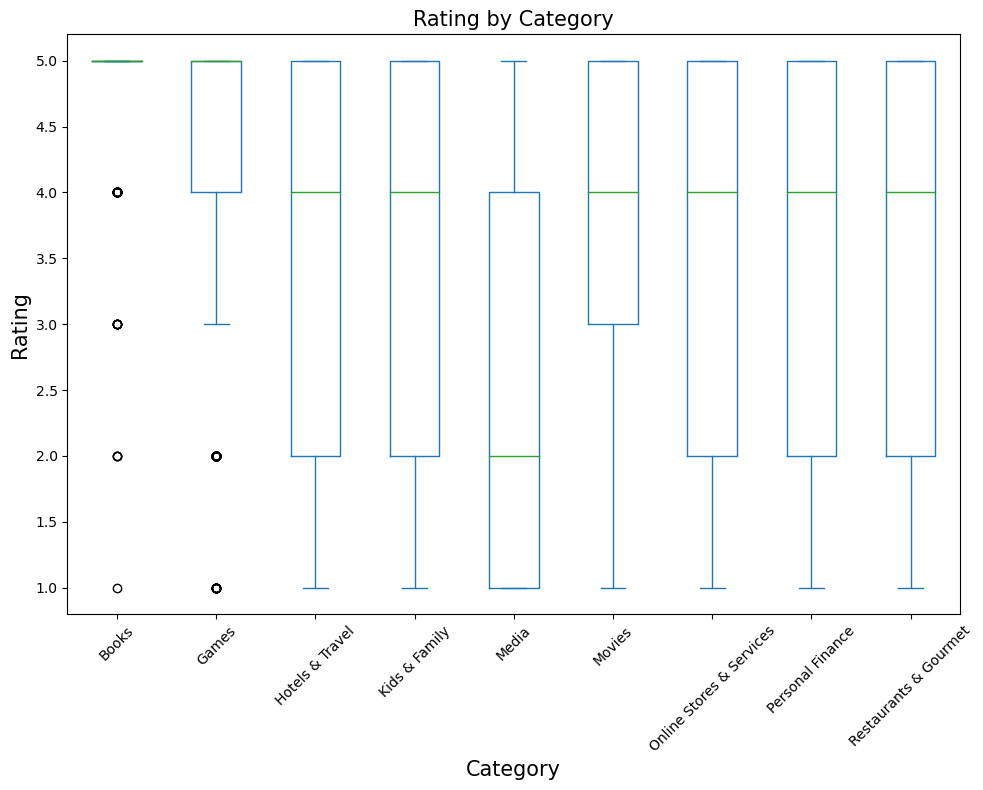

In [17]:
df_filtered.plot.box(column="rating", by="category",figsize = (10,8),fontsize = 10)

plt.xticks(rotation= 45)
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Rating', fontsize = 15)
plt.title('Rating by Category', fontsize = 15)

plt.tight_layout()

*The box plot shows user ratings for products in different categories. Books received the highest ratings with most users rating them 5 out of 5. Games had a high median rating of 5 and a lower quartile of 4. Media products had the lowest rating with a median of 2.*

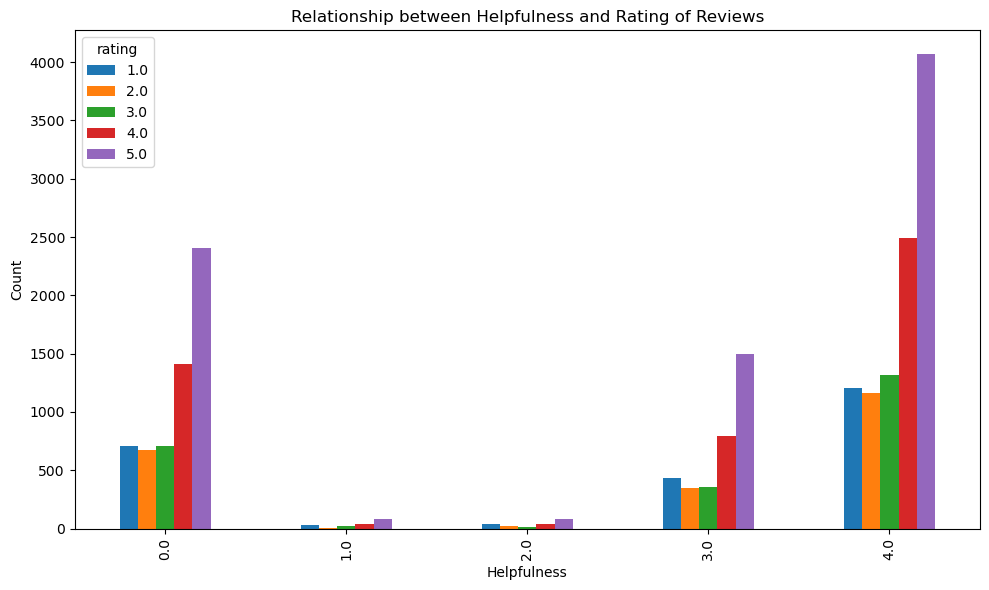

In [18]:
helpfulness_rating = df.groupby(['helpfulness', 'rating']).size().unstack()
helpfulness_rating.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Helpfulness')
plt.ylabel('Count')
plt.title('Relationship between Helpfulness and Rating of Reviews')

plt.tight_layout()

*The purpose of this bar chart is to demonstrate the correlation between helpfulness and review ratings. The data clearly indicates that the majority of helpful reviews are given a 5 rating. It also shows that most of reviews that are not helpful are given a 5 rating too.*

## Data set summary ##

*This data set captures information on users who have made purchases from various shops. The data includes details such as category, price, item identifier, rating, and review for each item purchased by users. Additionally, users have provided their own reviews of the items, and others have rated the helpfulness of those reviews. User information, including user ID, city, and gender, has also been recorded. This data set captures information on users who have made purchases from various shops. The data includes details such as category, price, item identifier, rating, and review for each item purchased by users. Additionally, users have provided their own reviews of the items, and others have rated the helpfulness of those reviews. User information, including user ID, city, and gender, has also been recorded. The overall rating for all categories and items is approximately 3.7. Blue's Clues is the most beloved item, with an average rating of 4.84, while Treeloot.com is the least favorite, only receiving an average rating of 1.27. The Books category is the most highly rated, with an average rating of 4.72, while Media is the lowest rated category, receiving an average rating of 2.72.*

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [43]:
# reviews of which the helpfulness is no more than 2

df_cleaned = df_filtered.drop((df_filtered[df_filtered['helpfulness'] <= 2].index))

In [44]:
# users who rate less than 7 items

user_counts = df_cleaned['userId'].value_counts()
users_to_remove = user_counts[user_counts < 7].index
df_cleaned = df_cleaned[~df_cleaned['userId'].isin(users_to_remove)]

In [45]:
# items that receives less than 11 ratings

item_counts = df_cleaned['item'].value_counts()
items_to_remove = item_counts[item_counts < 11].index
df_cleaned = df_cleaned[~df_cleaned['item'].isin(items_to_remove)]

In [46]:
print(df_cleaned.shape)

(2685, 11)


In [47]:
# make corresponding changes to the CSV file.

df_cleaned.to_csv("cleaned Data.csv")